# Importing the libraries


In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset

In [20]:
df=pd.read_csv(r"C:\Users\Sundar\Downloads\Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [21]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [22]:
df.drop(columns=["User ID"], inplace=True)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [23]:
df["Gender"] = df["Gender"].map({"Male" : 0, "Female" : 1})
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [24]:
df.drop(columns=["Gender"], inplace=True)
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


# Splitting the dataset into the Training set and Test set


In [25]:
y=df['Purchased'].values
x=df.drop(['Purchased'], axis=1).values

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=4)

# Feature Scaling
scaling is not mandatory for Decision Trees

# Fitting Decision Tree Classification to the Training set

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train) 


DecisionTreeClassifier()

# Predicting the Test set results

In [28]:
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [29]:
df_new = pd.DataFrame({'True_Target': y_test, 'Predicted_target': y_pred})
df_new

,True_Target,Predicted_target
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
115,1,1
116,0,0
117,1,0
118,1,1


# Making the Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix
cnf_matrix_test = confusion_matrix(y_test, y_pred)
cnf_matrix_test

array([[74,  7],
       [10, 29]], dtype=int64)

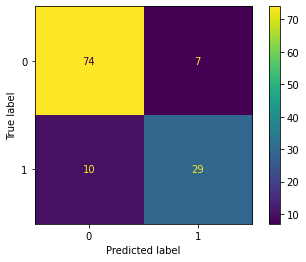

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cnf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=dt.classes_).plot()

# Visualising the Training set results

In [32]:
from mlxtend.plotting import plot_decision_regions

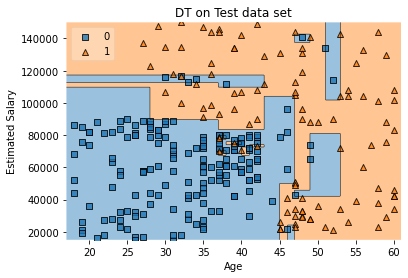

In [33]:
# Plotting decision regions
plot_decision_regions(x_train, y_train, clf=dt, legend=2)

# Adding axes annotations
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('DT on Test data set')
plt.show()

# Visualising the Test set results

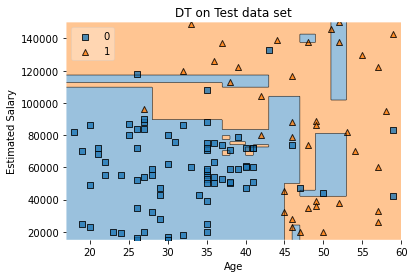

In [34]:
# Plotting decision regions
plot_decision_regions(x_test, y_test, clf=dt, legend=2)

# Adding axes annotations
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('DT on Test data set')
plt.show()

In [37]:

from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None) 
print(F1_score)


[0.8969697  0.77333333]


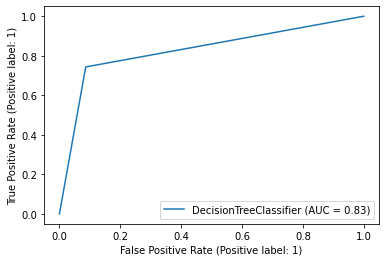

In [36]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(dt, x_test, y_test)

plt.show()